<a href="https://colab.research.google.com/github/devssom/data-analysis/blob/main/%EC%BD%94%EB%A1%9C%EB%82%98_%ED%99%95%EC%A7%84%EC%9E%90_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 코로나 확진자 데이터 분석

## 프로젝트 목표
- 서울시 코로나19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

## 프로젝트 목차
1. **데이터 읽기:** 코로나 데이터를 불러오고 Dataframe 구조를 확인<br>
    1.1. 데이터 불러오기<br>
<br> 
2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제<br>
    2.1. 비어있는 column 지우기<br>
<br>
3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악<br>
    3.1. 확진일 데이터 전처리하기<br>
    3.2. 월별 확진자 수 출력<br>
    3.3. 8월 일별 확진자 수 출력<br>
    3.4. 지역별 확진자 수 출력<br>
    3.5. 8월달 지역별 확진자 수 출력<br>
    3.6. 월별 관악구 확진자 수 출력<br>
    3.7. 서울 지역에서 확진자를 지도에 출력<br>

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273

## 프로젝트 개요

2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유행하였고 이에 대한 많은 분석이 이루어지고 있습니다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 6개월 이상 지난 지금은 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있습니다.

이번 프로젝트에서는 국내 공공데이터 포털에서 제공하는 `서울시 코로나19 확진자 현황` 데이터를 바탕으로 탐색적 데이터 분석을 수행해보겠습니다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였으며, 이를 바탕으로 코로나19의 확진 추이 및 환자 특성에 대해서 데이터를 바탕으로 알아봅시다.



# 데이터 읽기

## 데이터 불러오기

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# pd.read_csv 로 데이터프레임 형태로 읽어오기

corona_all = pd.read_excel("/content/서울시 코로나 확진자 데이터.xlsx")

In [55]:
# 상위 5개 데이터 출력
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,60663,2021-07-22,NaN,NaN,NaN,종로구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y
1,60662,2021-07-22,NaN,NaN,NaN,관악구,NaN,관악구 소재 사우나 관련(?21.7.),NaN,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y
2,60661,2021-07-22,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y
3,60660,2021-07-22,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y
4,60659,2021-07-22,NaN,NaN,NaN,성북구,NaN,기타 확진자 접촉,NaN,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y


In [46]:
# dataframe 정보를 요약해서 출력

corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60663 entries, 0 to 60662
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      60663 non-null  int64         
 1   확진일     60663 non-null  datetime64[ns]
 2   환자번호    0 non-null      float64       
 3   국적      0 non-null      float64       
 4   환자정보    0 non-null      float64       
 5   지역      60663 non-null  object        
 6   여행력     1366 non-null   object        
 7   접촉력     60663 non-null  object        
 8   조치사항    0 non-null      float64       
 9   상태      60663 non-null  object        
 10  이동경로    0 non-null      float64       
 11  등록일     60663 non-null  datetime64[ns]
 12  수정일     60663 non-null  datetime64[ns]
 13  노출여부    60663 non-null  object        
dtypes: datetime64[ns](3), float64(5), int64(1), object(5)
memory usage: 6.5+ MB


## 데이터 정제
데이터를 읽고 확인했다면 결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제 과정

### 2.1. 비어있는 column 지우기
`corona_all.info()` 코드를 통하여 `국적`, `환자정보`, `조치사항` 에 해당하는 데이터가 존재하지 않는 것을 알 수 있음.

`dataframe.drop()`를 사용하여 불필요한 `국적`, `환자정보`, `조치사항` 의 column 데이터를 삭제하고 이 dataframe을 `corona_del_col`에 저장.


In [66]:
corona_del_col = corona_all.drop(columns = ['국적','환자정보','조치사항'])
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60663 entries, 0 to 60662
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   연번      60663 non-null  int64         
 1   확진일     60663 non-null  datetime64[ns]
 2   환자번호    0 non-null      float64       
 3   지역      60663 non-null  object        
 4   여행력     1366 non-null   object        
 5   접촉력     60663 non-null  object        
 6   상태      60663 non-null  object        
 7   이동경로    0 non-null      float64       
 8   등록일     60663 non-null  datetime64[ns]
 9   수정일     60663 non-null  datetime64[ns]
 10  노출여부    60663 non-null  object        
dtypes: datetime64[ns](3), float64(2), int64(1), object(5)
memory usage: 5.1+ MB


## 3. 데이터 시각화
데이터 정제를 완료한 `corona_del_col` 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통해 알아보기.

### 3.1. 확진일 데이터 전처리하기
`확진일` 데이터를 간단히 출력해보면 `연-월-일` 형태의 날짜 형식임을 알 수 있음.
월별, 일별 분석을 위해서 문자열 형식의 데이터를 나누어 숫자형 데이터로 변환하기.

In [67]:
corona_del_col["확진일"]

0       2021-07-22
1       2021-07-22
2       2021-07-22
3       2021-07-22
4       2021-07-22
           ...    
60658   2020-01-31
60659   2020-01-30
60660   2020-01-30
60661   2020-01-30
60662   2020-01-24
Name: 확진일, Length: 60663, dtype: datetime64[ns]

#### `확진일` 데이터를 `year`, `month`, `day` 데이터로 나누기
`확진일`에 저장된 datetime 데이터를 나누어 `year`, `month`, `day` column에 int64 형태로 저장하기

In [68]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언.

year = []
month = []
day = []

for data in corona_del_col["확진일"]:
  # split 함수를 사용해서 연, 월, 일을 나누어 리스트에 저장하기
  year.append(data.year)
  month.append(data.month)
  day.append(data.day)

In [72]:
# corona_del_col에 `year`, `month`, `day` column을 생성하며 동시에 list에 임시 저장된 데이터를 입력.

corona_del_col["year"] = year
corona_del_col["month"] = month
corona_del_col["day"] = day

corona_del_col["year"].astype("int64")
corona_del_col["month"].astype("int64")
corona_del_col["day"].astype("int64")

corona_del_col

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,year,month,day
0,60663,2021-07-22,NaN,종로구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
1,60662,2021-07-22,NaN,관악구,NaN,관악구 소재 사우나 관련(?21.7.),-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
2,60661,2021-07-22,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
3,60660,2021-07-22,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
4,60659,2021-07-22,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60658,5,2020-01-31,NaN,성북구,NaN,기타 확진자 접촉,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,2020,1,31
60659,4,2020-01-30,NaN,마포구,중국,해외유입,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,2020,1,30
60660,3,2020-01-30,NaN,종로구,NaN,종로구 집단발병,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,2020,1,30
60661,2,2020-01-30,NaN,중랑구,중국,해외유입,퇴원,NaN,2021-05-27 11:08:12,2021-05-27 11:08:12,Y,2020,1,30


### 3.2. 월별 확진자 수 출력
나누어진 `month`의 데이터를 바탕으로 달별 확진자 수를 막대그래프로 출력.

In [70]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성.

order = []
for i in range(1, 13):
  order.append(str(i))

order

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [105]:
# 2021년 데이터만 가져오기

iscorona2021 = corona_del_col["year"] == 2021
corona2021 = corona_del_col[iscorona2021]
corona2021

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,year,month,day
0,60663,2021-07-22,NaN,종로구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
1,60662,2021-07-22,NaN,관악구,NaN,관악구 소재 사우나 관련(?21.7.),-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
2,60661,2021-07-22,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
3,60660,2021-07-22,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
4,60659,2021-07-22,NaN,성북구,NaN,기타 확진자 접촉,-,NaN,2021-07-23 11:00:37,2021-07-23 11:00:37,Y,2021,7,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41305,19358,2021-01-01,NaN,관악구,NaN,감염경로 조사중,퇴원,NaN,2021-05-27 11:08:51,2021-05-27 11:08:51,Y,2021,1,1
41306,19357,2021-01-01,NaN,동작구,NaN,감염경로 조사중,퇴원,NaN,2021-05-27 11:08:51,2021-05-27 11:08:51,Y,2021,1,1
41307,19356,2021-01-01,NaN,금천구,NaN,기타 확진자 접촉,퇴원,NaN,2021-05-27 11:08:51,2021-05-27 11:08:51,Y,2021,1,1
41308,19355,2021-01-01,NaN,동작구,NaN,감염경로 조사중,퇴원,NaN,2021-05-27 11:08:51,2021-05-27 11:08:51,Y,2021,1,1


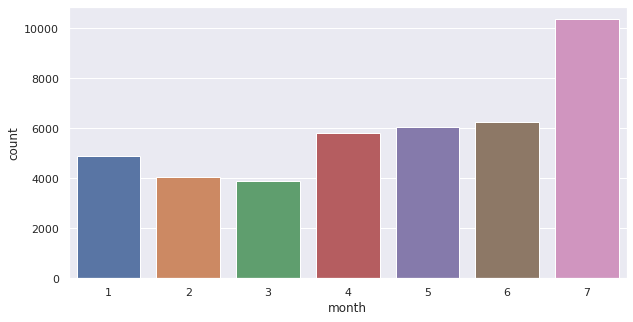

In [106]:
# 그래프의 사이즈를 조절.
plt.figure(figsize=(10,5))

# seaborn의 countplot 함수를 사용하여 출력.
sns.set(style="darkgrid")
ax = sns.countplot(data=corona2021, x="month")

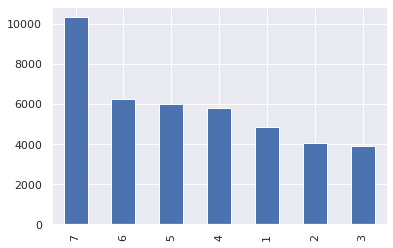

In [107]:
# series의 plot 함수를 사용한 출력 방법도 있음.
corona2021['month'].value_counts().plot(kind='bar')   

In [110]:
# 위에서 value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수.
corona2021['month'].value_counts()

7    10342
6     6257
5     6030
4     5804
1     4878
2     4061
3     3898
Name: month, dtype: int64